In [1]:
import os
os.chdir('/workspaces/work_utils2')

In [2]:
import presentation
import pandas as pd
import random_dataframe as rd
import query_tools as qt

In [3]:
ppt = presentation.PowerPointPresentation(template_filepath='presentation/assets/Blank.pptx')

# Create Title

In [4]:
# slide = ppt.add_slide('Title Only')
# slide.set_title(title='Title', subtitle='Subtitle')

# Load Mock-up Data

In [5]:
import json
with open('/workspaces/work_utils2/notebooks/creating_random_data/example_03.json', 'r') as f:
    specs = json.load(f)
df = rd.create_dataframe(specs, n_rows=1000, random_seed=42)
df.head(3)

,id,name,open_date,open_week,open_month,customer_id,score,active,value,category,product_category,quantity,price,is_discounted
0,1001,ZCoQh8uM5sw,2024-01-18,2024-09-13,2024-02-29,14,84.772634,True,110.326548,Low,Books,4,20.301470,False
1,1002,None,2024-05-28,2024-02-16,2024-08-31,482,76.796954,True,105.096745,Medium,Food,1,28.628610,False
2,1003,Gl5v8RyWA6PB7po99U9YR2Z4c,2024-09-14,2024-07-26,2024-06-30,56,74.505334,False,122.809963,Low,Clothing,3,47.137104,False


## Slide 1

In [6]:
agg_config = {
    "type": "aggregation",
    "spec": {
        "groupby": ["product_category"],
        "aggregations": [
            {"column": "customer_id", "function": "nunique", "name": "Customer Count"},
            {"column": "price", "function": "mean", "name": "Avg Price"},
            {"column": "quantity", "function": "sum", "name": "Total Quantity"},
            {"column": "is_discounted", "function": "mean", "name": "Discount Rate"},
        ]
    }
}
agg_df = qt.aggregations.process_aggregation(df, agg_config) \
    .set_index(agg_config['spec']['groupby'])
agg_df

,Customer Count,Avg Price,Total Quantity,Discount Rate
product_category,,,,
Books,130,31.386237,385,0.279720
Clothing,226,34.698821,702,0.322835
Electronics,257,31.499103,787,0.323944
Food,182,34.697477,496,0.285000
Home,112,35.230801,316,0.277311


In [7]:
default_style_settings = {
    "header": {
        "fill": "#FFFFFF",
        "vertical_alignment": "middle",
        "horizontal_alignment": "left",
        "font": {
            "color": "#000000",
            "bold": True,
            "size": 11,
            "name": "Arial"
        }
    },
    "defaults": {
        "fill": "#FFFFFF",
        "font": {
            "color": "#000000",
            "bold": False,
            "size": 11,
            "name": "Arial"
        }
    },
    "column_labels": {
        "product_category": "Product Category",
        "sales_amount": "Sales ($)",
        "units_sold": "Units",
        "profit_margin": "Profit %",
        "growth_rate": "Growth",
        "is_discounted": "Discounted",
    },
    "number_formats": {
        "Customer Count": ",.0f",
        "Avg Price": "$,.2f",
        "Total Quantity": ",",
        "Discount Rate": ".1%",
    }
}

In [8]:
slide = ppt.add_slide('Title Only')
slide.set_title(title='Data', subtitle='Aggregation 1')
style_settings = default_style_settings.copy()
style_settings["column_widths"] = [1.0, 1.0, 1.0, 1.0, 1.0]
slide.add_table(data=agg_df, left=0.5, top=1.5, width=8, height=3, style_settings=style_settings)

# Slide 2

In [9]:
agg_config = {
    "type": "aggregation",
    "spec": {
        "groupby": ["product_category", "is_discounted"],
        "aggregations": [
            {"column": "customer_id", "function": "nunique", "name": "Customer Count"},
            {"column": "price", "function": "mean", "name": "Avg Price"},
            {"column": "quantity", "function": "sum", "name": "Total Quantity"},
            {"column": "is_discounted", "function": "mean", "name": "Discount Rate"},
        ]
    }
}
agg_df = qt.aggregations.process_aggregation(df, agg_config) \
    .set_index(agg_config['spec']['groupby'])
agg_df

Customer Count  Avg Price  Total Quantity  \
product_category is_discounted                                              
Books            False                      94  30.707658             278   
                 True                       40  33.133576             107   
Clothing         False                     160  35.138506             489   
                 True                       81  33.776553             213   
Electronics      False                     176  33.324410             517   
                 True                       91  27.689767             270   
Food             False                     129  35.511080             366   
                 True                       57  32.656334             130   
Home             False                      81  32.077423             232   
                 True                       31  43.448693              84   

                                Discount Rate  
product_category is_discounted                 
Books            False                    0.0  
                 True                     1.0  
Clothing         False                    0.0  
                 True                     1.0  
Electronics      False                    0.0  
                 True                     1.0  
Food             False                    0.0  
                 True                     1.0  
Home             False                    0.0  
                 True                     1.0

In [10]:
slide = ppt.add_slide('Title Only')
slide.set_title(title='Data', subtitle='Aggregation 2')
style_settings = default_style_settings.copy()
style_settings["column_widths"] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
slide.add_table(data=agg_df, left=0.5, top=1.5, width=8, height=3, style_settings=style_settings)

# Save Presentation

In [12]:
ppt.save('test.pptx')

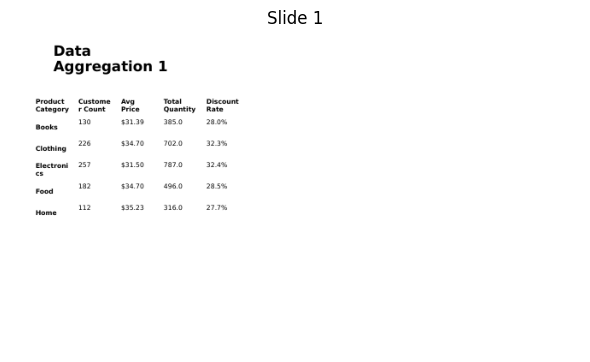

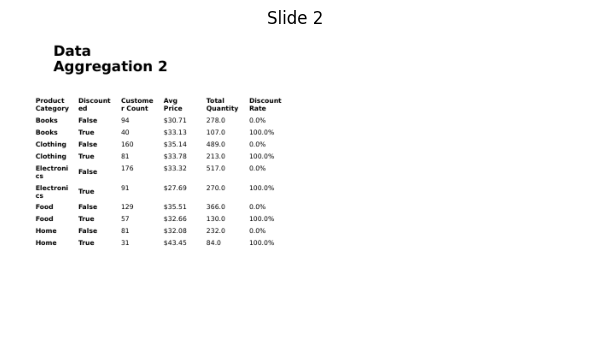

In [13]:
from presentation.pptx_preview import preview_presentation
# Preview an existing presentation
preview_presentation(ppt, figsize=(12/2, 8/2), dpi=50)